# Laboratorio 4: Convolución de señales discretas

Integrantes:

Yamid Azcarate Navarro

Sergio Alejandro mora Roa



## Punto 1:

**a)** Cargue y escuche el audio "song.wav".

In [5]:
# Importación de librerías
!pip install playsound
import scipy.io.wavfile as waves
from playsound import playsound
import IPython.display as ipd
import numpy as np
import scipy.signal as signal

In [6]:
# Cargue del audio "song.wav"
audio = 'song.wav'
Fs, y = waves.read(audio) # Pass the file-like object to waves.read
ipd.Audio(audio, rate=Fs) # Pass the file-like object to ipd.Audio

**b)** Cargue y escuche el audio 'ConcertHall.wav'.

In [7]:
# Cargue del audio "ConcertHall.wav"
# Completar: repita el procedimiento realizado para cargar el audio "song.wav"
audio_1 = 'ConcertHall.wav'
Fs1, y1 = waves.read(audio_1)
ipd.Audio(audio_1, rate=Fs1)

In [8]:
# Asegúrese que los audios cargados estén en configuración mono, Hint: revise el tamaño de los arrays con la función shape, y.shape!!!
y = y[:,0]

In [9]:
# Realice la normalización de los audios
y = y / np.max(np.abs(y)) #Normalización del audio "song.wav"
y1 = y1 / np.max(np.abs(y1)) #Normalización del audio "ConcertHall.wav"

**c)** Realice la convolución de las señales y escuche el audio resultante.

In [10]:
# Complete la función que realiza la convolución entre dos señales discretas
def convolucion_audio(signal_1, signal_2):
    convolucion = np.convolve(signal_1, signal_2)
    return convolucion

In [11]:
# Comando para ejecutar la convolución.
convolucion = convolucion_audio(y, y1)
# Comando para escuchar la convolución
ipd.Audio(convolucion, rate=Fs)

### Análisis de resultados:

Luego de escuchar el resultado de la convolución, ¿qué diferencias encuentra con el audio "song.wav"? ¿Qué puede decir sobre la utilidad de la convolución en este contexto?

## Punto 2

**a)** Complete la función **NewConv** para que realice de forma matemática la convolución entre dos señales.

In [12]:
# Complete la función que realiza la convolución entre dos señales discretas. Sin usar la función np.convolve.
def NewConv(x, h):
    tamano_x =  len(x) # Completar: calcule el tamaño del vector x
    tamano_h =  len(h) # Completar: calcule el tamaño del vector h
    tamano_y =  tamano_h + tamano_x - 1 # Completar: calcule el tamaño del vector y (resultado de la convolución)
    y = np.zeros(tamano_y)

    for n in range(tamano_y):
        for k in range(tamano_h):
            if (n - k) >= 0 and (n - k) < tamano_x:
                y[n] += x[n-k]*h[k] # Completar: introduzca la expresión matemática de una convolución
    return y

**b)**	Pruebe la función **NewConv** con los vectores “*a*” y “*h*”. Imprima el resultado

In [13]:
# Completar: inicialice y declare los vectores a y h.
a = np.array([1, 2, 3, 4, 5,6,7])
h = np.array([5,1 ,3,1,2])

# Completar: ejecute la convolución utilizando la función NewConv e imprima en consola el resultado obtenido.
new_c = NewConv(a, h)
print(new_c)

[ 5. 11. 20. 30. 42. 54. 66. 38. 37. 19. 14.]


**c)**	Compare el resultado obtenido de convolucionar los vectores “*a*” y “*h*” con las funciones **NewConv** y **convolucion_audio**. Note que, los vectores resultantes deben ser iguales.

In [15]:
# Completar: convolucione las señales "a" y "h" empleando la función convolucion_audio() del numeral 1 e imprima en consola el resultado obtenido.
convolucion = convolucion_audio(a, h)
print(convolucion)

[ 5 11 20 30 42 54 66 38 37 19 14]


### Análisis de resultados:

## Punto 3

Grafique en un subplot de 4 posiciones los vectores “*a*” y “*h*” junto con los resultados de convolucionar “*a*” y “*h*” con **NewConv** y con **convolucion_audio**. Comente los resultados.

In [17]:
# Importación de librerías
import matplotlib.pyplot as plt

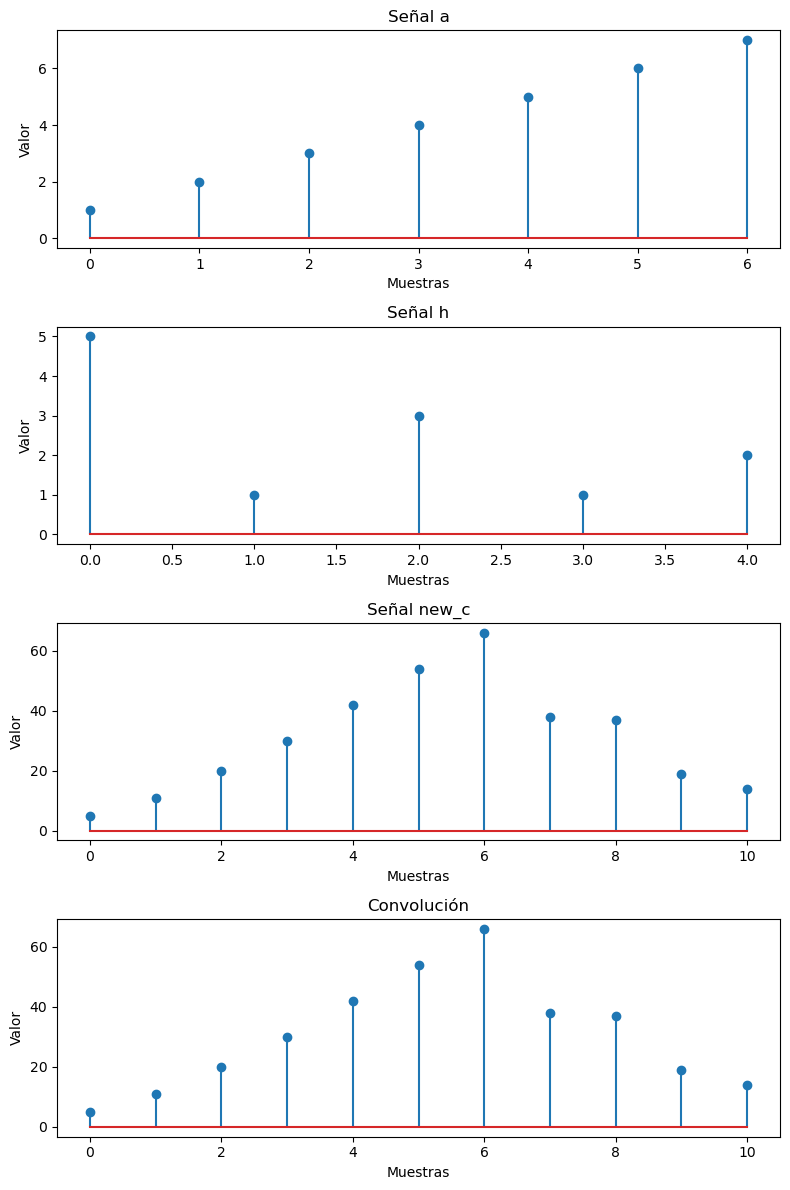

In [18]:
# Se define el subplot
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Graficar señal a
axs[0].stem(a) # Completar
axs[0].set_ylabel('Valor')
axs[0].set_xlabel('Muestras')
axs[0].set_title('Señal a')

# Graficar señal h
axs[1].stem(h)  # Completar
axs[1].set_ylabel('Valor')
axs[1].set_xlabel('Muestras')
axs[1].set_title('Señal h')

# Graficar señal new_c
axs[2].stem(new_c)  # Completar
axs[2].set_ylabel('Valor')
axs[2].set_xlabel('Muestras')
axs[2].set_title('Señal new_c')

# Graficar convolución
axs[3].stem(convolucion)
axs[3].set_ylabel('Valor')
axs[3].set_xlabel('Muestras')
axs[3].set_title('Convolución')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()
